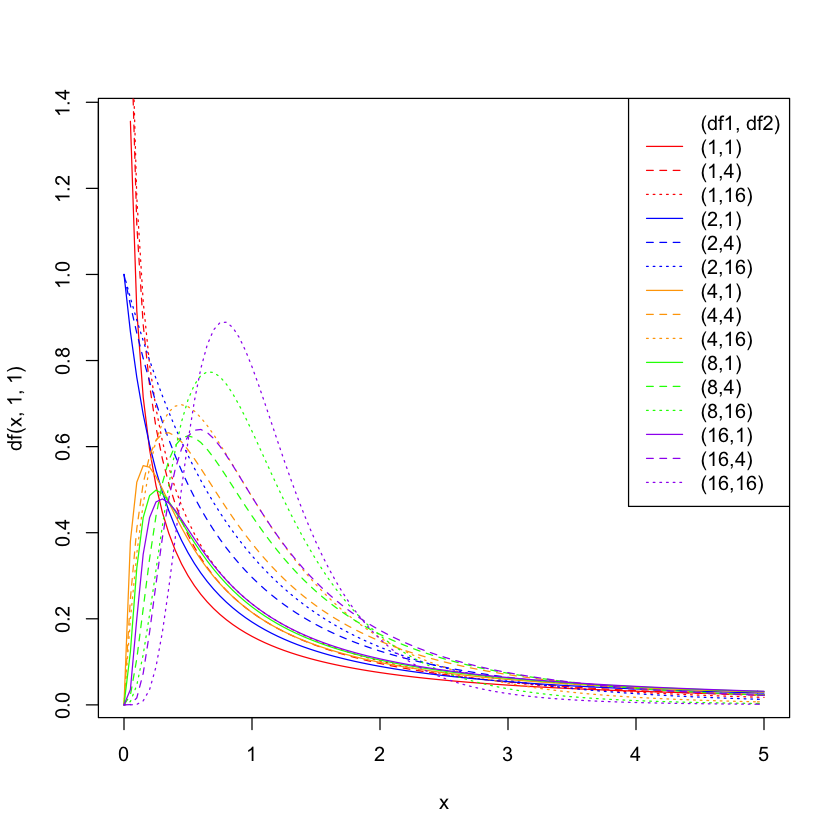

In [2]:
# F分布
curve(df(x,1,1),0,5,col="red")
curve(df(x,1,4),0,5,add=TRUE,col="red", lty=2)
curve(df(x,1,16),0,5,add=TRUE,col="red", lty=3)
curve(df(x,2,1),0,5,add=TRUE,col="blue")
curve(df(x,2,4),0,5,add=TRUE,col="blue", lty=2)
curve(df(x,2,16),0,5,add=TRUE,col="blue", lty=3)
curve(df(x,4,1),0,5,add=TRUE,col="orange")
curve(df(x,4,4),0,5,add=TRUE,col="orange", lty=2)
curve(df(x,4,16),0,5,add=TRUE,col="orange", lty=3)
curve(df(x,8,1),0,5,add=TRUE,col="green")
curve(df(x,8,4),0,5,add=TRUE,col="green", lty=2)
curve(df(x,8,16),0,5,add=TRUE,col="green", lty=3)
curve(df(x,16,1),0,5,add=TRUE,col="purple")
curve(df(x,16,4),0,5,add=TRUE,col="purple", lty=2)
curve(df(x,16,16),0,5,add=TRUE,col="purple", lty=3)

legend("topright",
       legend=c("(df1, df2)","(1,1)","(1,4)","(1,16)","(2,1)","(2,4)","(2,16)","(4,1)","(4,4)","(4,16)","(8,1)","(8,4)","(8,16)","(16,1)","(16,4)","(16,16)"),
       lty=c(0,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3),
       col=c("","red","red","red","blue","blue","blue","orange","orange","orange","green","green","green","purple","purple","purple"))

In [29]:
# 対応なしの一元配置分散分析
## 帰無仮説：4群の平均値に有意差がない
## 対立仮説：4群の平均値のうち少なくとも1つは他の群と比べて有意差がある
A <- c(15,9,18,14,18)
B <- c(13,8,8,12,7)
C <- c(10,6,11,7,12)
D <- c(10,7,3,5,7)
rbind(A,B,C,D)
test <- c(A,B,C,D)
lesson <- c(rep("A",5),rep("B",5),rep("C",5),rep("D",5))
lesson <- factor(lesson) # 文字列型ベクトルから要因型ベクトルに変換
rbind(test,lesson)

A,15,9,18,14,18
B,13,8,8,12,7
C,10,6,11,7,12
D,10,7,3,5,7


test,15,9,18,14,18,13,8,8,12,7,10,6,11,7,12,10,7,3,5,7
lesson,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4


In [23]:
### 1. oneway.test 関数
oneway.test(test~lesson,var.equal=TRUE)


	One-way analysis of means

data:  test and lesson
F = 7.1111, num df = 3, denom df = 16, p-value = 0.002988


In [24]:
### 2. aov 関数 (analysis of variance)
aov(test~lesson)

Call:
   aov(formula = test ~ lesson)

Terms:
                lesson Residuals
Sum of Squares     184       138
Deg. of Freedom      3        16

Residual standard error: 2.936835
Estimated effects may be unbalanced

In [25]:
summary(aov(test~lesson)) # 見やすくサマる

            Df Sum Sq Mean Sq F value  Pr(>F)   
lesson       3    184   61.33   7.111 0.00299 **
Residuals   16    138    8.63                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [26]:
### 3. anova 関数 (analysis of variance)
anova(lm(test~lesson))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
lesson,3,184,61.33333,7.111111,0.002987783
Residuals,16,138,8.62500,NA,NA


In [30]:
### 各群のサンプルサイズをバラバラにしてみる
A <- c(15,9,18)
B <- c(13,8,8)
C <- c(10,6,11,7,12,7,12,14,18)
D <- c(10,7,3,5,7)
test <- c(A,B,C,D)
lesson <- c(rep("A",3),rep("B",3),rep("C",9),rep("D",5))
lesson <- factor(lesson) # 文字列型ベクトルから要因型ベクトルに変換
rbind(test,lesson)
anova(lm(test~lesson))

test,15,9,18,13,8,8,10,6,11,7,12,7,12,14,18,10,7,3,5,7
lesson,1,1,1,2,2,2,3,3,3,3,3,3,3,3,3,4,4,4,4,4


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
lesson,3,118.5778,39.52593,3.108878,0.05595215
Residuals,16,203.4222,12.71389,NA,NA
